##Задание

Вы уже заполнили форму
Не закрывай эту страницу!

Спасибо за заполнение формы.
Ниже представлено тестовое задание, как будешь готов, начинай его делать.

Есть сайт-конструктор одежды, на который встроен трекер.
События, которые он собирает, описаны здесь https://docs.google.com/spreadsheets/d/1c8v6iCsCVQM0KqJYqV_kCLlfu09xq_BqACBcPImyflw/edit?usp=sharing
По второй ссылке - файл с сэмплом данных из этого трекера.
https://drive.google.com/file/d/1LbXvLTU5sSlP3ITeWRZ7RwgLmidgC2a7/view?usp=drive_link

Большая часть трафика на сайт приходит с мобильных устройств, это важно.

Используя любые средства и методы необходимо изучить данные и попытаться ответить на вопрос "Что не так с конверсией?". Артефактом задания является jupyter-ноутбук и сформированный в выводах ответ или перечень гипотез.

Дедлайна нет, но чтобы мы могли обеспечить качественный фидбек - просьба сообщить https://t.me/lexachatsky когда вам будет удобно прислать задание.

Форму можно отправить только один раз.

Свяжитесь с ее владельцем, если считаете, что произошла ошибка.

Изменить ответ https://docs.google.com/forms/u/0/d/e/1FAIpQLSfPX6Ef_mdmsLXh7Kdn6hlo0sYP6XaebGjZk87j-K5C11Oi6A/viewform?usp=already_responded&edit2=2_ABaOnucJrT-cNBG8FmMfMvxjlSAF1p58mhkZ64no_O2T224ubzOR4_k_GpIF_zj73A

#Start

##Load Dataset

In [ ]:
!gdown --id 1SnEU_msn7PRLjjIShPtgPXUcWd6HGehS

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/gdown/cli.py", line 151, in main
    filename = download(
  File "/usr/local/lib/python3.10/dist-packages/gdown/download.py", line 155, in download
    res = sess.get(url, stream=True, verify=verify)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 602, in get
    return self.request("GET", url, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 589, in request
    resp = self.send(prep, **send_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/requests/sessions.py", line 703, in send
    r = adapter.send(request, **kwargs)
  File "/usr/local/lib/python3.1

In [ ]:
!unzip "/content/amplitude_test.zip"

Archive:  /content/amplitude_test.zip
replace amplitude_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

##Init

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/amplitude_test.csv')

In [ ]:
df['client_event_time'] = pd.to_datetime(df['client_event_time'])

In [ ]:
df['device_id'] = df['device_id'].astype('category')

In [ ]:
df.sample(3)

,Unnamed: 0,client_event_time,device_id,session_id,language,country,region,platform,os_name,device_type,device_family,event_type,event_properties,user_properties
254266,254266,2023-11-12 12:17:21.707,a9b50fb8-017e-4b9b-8a02-463891838501,1699791437829,German,Austria,Vienna,Web,Chrome,NaN,K,Configurator start,"{'type': 'Hoodie', 'point.header': 'https://ex...","{'initial_utm_medium': 'EMPTY', 'initial_refer..."
86645,86645,2023-11-08 10:58:10.644,e8d1bebd-2d8a-49d4-8b77-95d8e911635a,1699440845358,English,Germany,Baden-Wurttemberg,Web,Instagram,Apple iPhone SE 2nd Gen,Apple iPhone,Work with the configurator,{'pressed button': 'incision'},{'fbclid': 'PAAaZstXOX4tS9oY_AHWGD243Pv7WPGCEF...
47513,47513,2023-11-07 14:08:20.994,d15ce13d-83f5-464b-81ee-e5b96f658812,1699365861572,English,United Kingdom,England,Web,Mobile Safari,Apple iPhone,Apple iPhone,Work with the configurator,{'pressed button': 'bottom-sleeve'},{}


#EDA

##Общее

In [ ]:
df.shape

(815466, 14)

In [ ]:
df.isna().mean().sort_values(ascending=False)

device_type          0.191569
region               0.046592
country              0.000856
os_name              0.000002
device_family        0.000002
Unnamed: 0           0.000000
client_event_time    0.000000
device_id            0.000000
session_id           0.000000
language             0.000000
platform             0.000000
event_type           0.000000
event_properties     0.000000
user_properties      0.000000
dtype: float64

In [ ]:
df['event_type'].unique()

array(['session_end', 'session_start', '[Amplitude] Page Viewed',
       'Configurator start', 'Work with the configurator',
       'basket config pressed', 'product add', 'order view',
       'Next button clicked', 'Random button clicked', 'basket press',
       'product removed', 'FAQ 5', 'Home page viewed',
       'product card submitted', '[Amplitude] Form Started',
       'personal info submitted', 'Add another one pressed', 'FAQ 2',
       'FAQ 3', 'FAQ 4', 'shipping info submitted',
       'how to order footer pressed',
       'payment and delivered footer pressed', 'about us footer pressed',
       'review pressed', '[Amplitude] Form Submitted',
       'payment info submitted', 'Track order put',
       'contact footer pressed', 'FAQ 1', 'contact header pressed',
       'plus item', 'minus item', 'police doc pressed',
       'Track order press', 'offer doc pressed'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815466 entries, 0 to 815465
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         815466 non-null  int64         
 1   client_event_time  815466 non-null  datetime64[ns]
 2   device_id          815466 non-null  category      
 3   session_id         815466 non-null  int64         
 4   language           815466 non-null  object        
 5   country            814768 non-null  object        
 6   region             777472 non-null  object        
 7   platform           815466 non-null  object        
 8   os_name            815464 non-null  object        
 9   device_type        659248 non-null  object        
 10  device_family      815464 non-null  object        
 11  event_type         815466 non-null  object        
 12  event_properties   815466 non-null  object        
 13  user_properties    815466 non-null  object  

In [ ]:
#Проверяем уникальные значения по столбцам
a = {}
for col in df.columns:
  a[col] = df[col].nunique()

pd.DataFrame(list(a.items()), columns=('Column', 'nunique'))

,Column,nunique
0,Unnamed: 0,815466
1,client_event_time,783384
2,device_id,13511
3,session_id,17599
4,language,46
5,country,93
6,region,988
7,platform,1
8,os_name,21
9,device_type,441


In [ ]:
df.groupby('country')[['session_id']].count().sort_values('session_id', ascending=False)

,session_id
country,
Germany,191389
United States,73070
Austria,67315
United Kingdom,61475
Sweden,58205
...,...
Mongolia,3
Kuwait,3
Kyrgyzstan,3


In [ ]:
top_15_cntr = df.groupby('country',  as_index=False)['session_id'].nunique().sort_values('session_id', ascending=False).reset_index().head(15)['country']
top_15_cntr

0            Germany
1      United States
2     United Kingdom
3            Austria
4             Sweden
5             Norway
6             France
7              Italy
8        Switzerland
9     Czech Republic
10            Poland
11       Netherlands
12            Serbia
13             Spain
14           Hungary
Name: country, dtype: object

In [ ]:
top_5_os = df[df['country'].isin(top_15_cntr)].groupby(['os_name'], as_index=False)[['session_id']].nunique().sort_values('session_id', ascending=False).head(5)['os_name']
top_5_os

9           Instagram
0              Chrome
11      Mobile Safari
6            Facebook
15    Samsung Browser
Name: os_name, dtype: object

In [ ]:
#Создаем фильтр топ 15 стран и топ 5 ОС
filter = (df['country'].isin(top_15_cntr)) * (df['os_name'].isin(top_5_os))

<Axes: xlabel='country'>

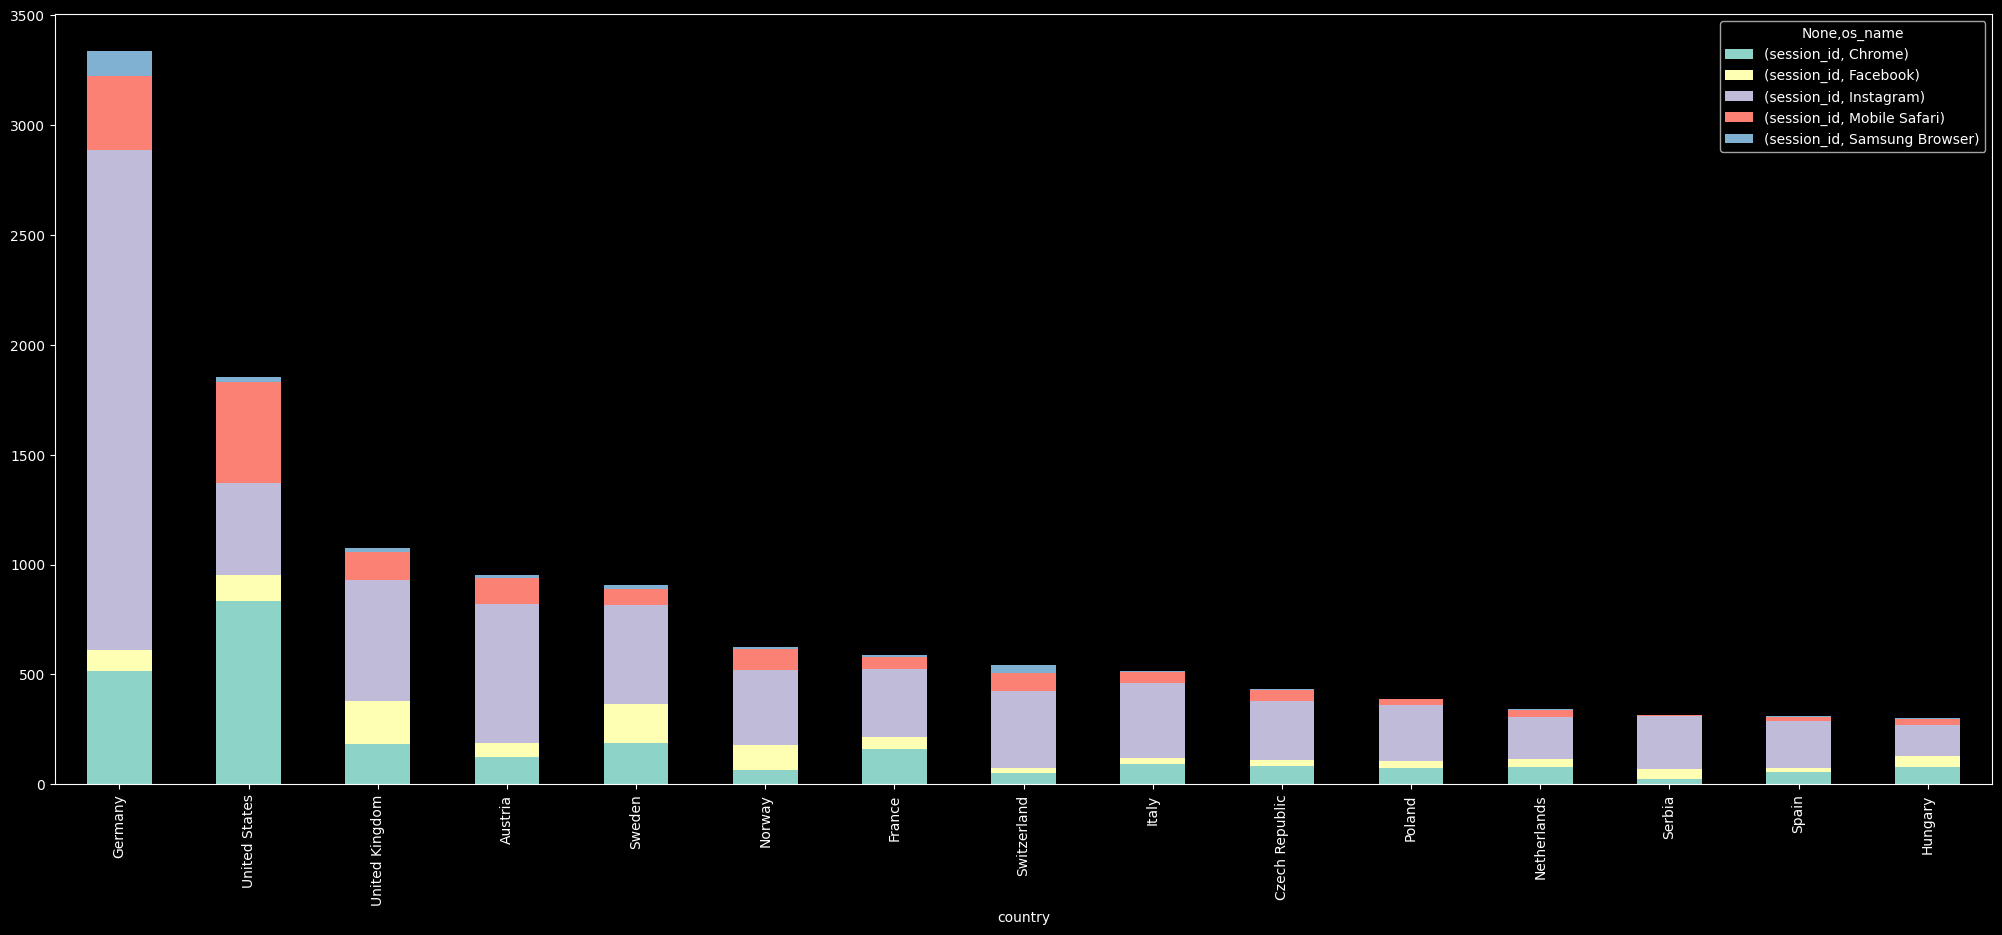

In [ ]:
t = df[filter].groupby(['country', 'os_name'])[['session_id']].nunique().unstack('os_name')

t['total'] = t.sum(axis=1)
t = t.sort_values('total', ascending=False)
t = t.drop('total', axis=1)

t.plot(kind='bar', stacked=True, figsize=(25, 10))

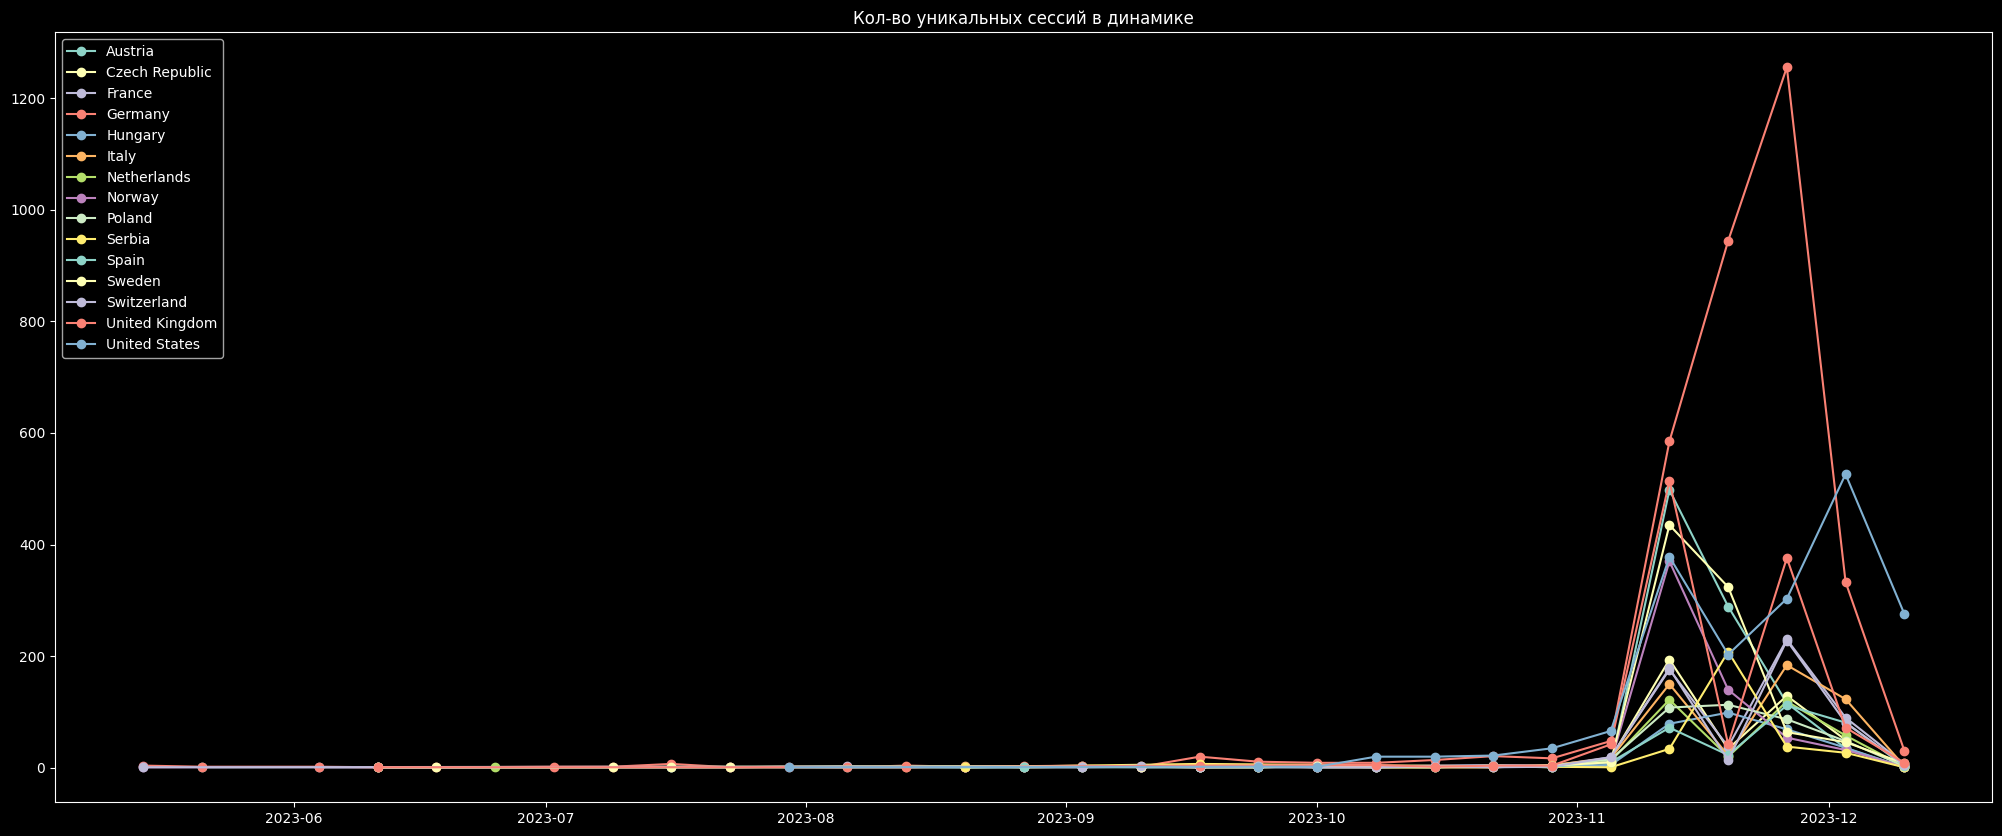

In [ ]:
plt.figure(figsize=(25, 10))
t = df[filter].groupby([pd.Grouper(key='client_event_time', freq='W'), 'country'])['session_id'].nunique().reset_index()

for country, group in t.groupby('country'):
  plt.plot(group['client_event_time'], group['session_id'], label=country, marker='o')

plt.legend(loc='upper left')

plt.title('Кол-во уникальных сессий в динамике');

In [ ]:
#Дополняем фильтр убрав даты в которых минимум активности
filter_2 = filter * (df['client_event_time'] > '2023-10-22')

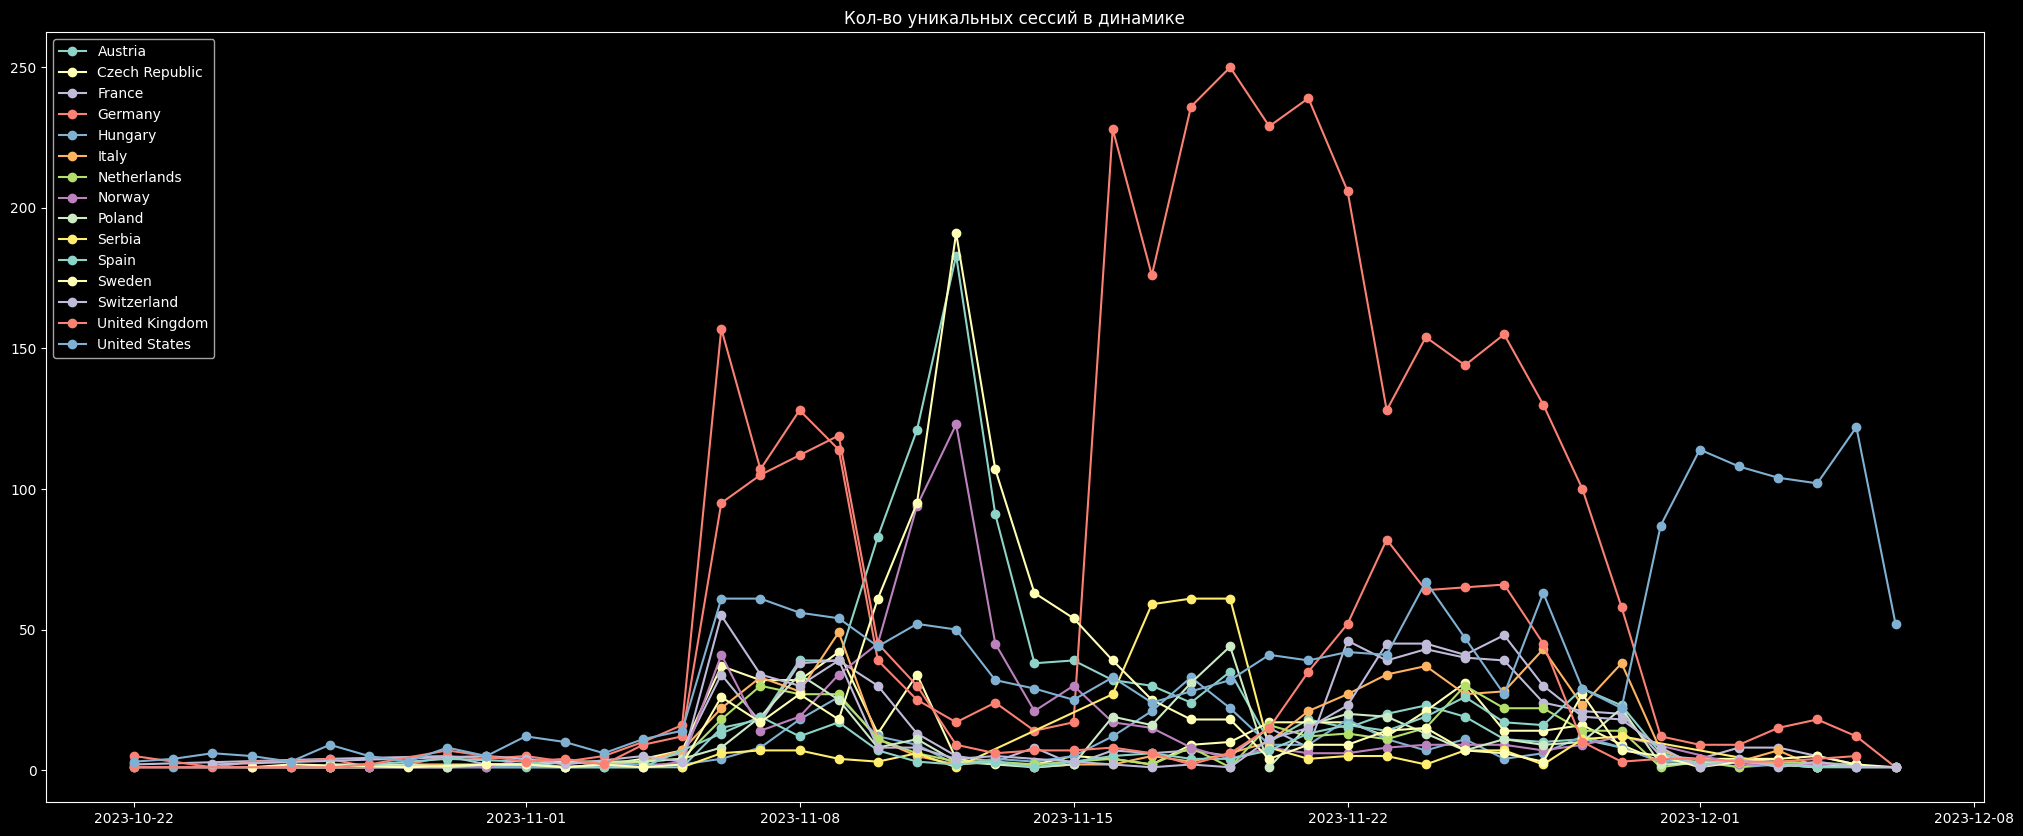

In [ ]:
plt.figure(figsize=(25, 10))
t = df[filter_2].groupby([pd.Grouper(key='client_event_time', freq='D'), 'country'])['session_id'].nunique().reset_index()

for country, group in t.groupby('country'):
  plt.plot(group['client_event_time'], group['session_id'], label=country, marker='o')

plt.legend(loc='upper left')

plt.title('Кол-во уникальных сессий в динамике');

In [ ]:
data_countries = df[filter_2].groupby(['country', 'os_name', pd.Grouper(key='client_event_time', freq='D'), 'event_type'])[['session_id']].nunique().unstack('event_type')
data_countries['total'] = data_countries.sum(axis=1)
data_countries = data_countries.sort_values('total', ascending=False)


data_countries.columns = [''.join(col[1]).strip() for col in data_countries.columns.values]
data_countries['total'] = data_countries['']
data_countries = data_countries.drop('', axis=1)

data_countries

Add another one pressed  \
country os_name   client_event_time                            
Germany Instagram 2023-11-19                             4.0   
                  2023-11-20                             3.0   
                  2023-11-18                             NaN   
                  2023-11-21                             2.0   
                  2023-11-16                             1.0   
...                                                      ...   
Sweden  Chrome    2023-11-03                             NaN   
                  2023-11-04                             NaN   
        Facebook  2023-10-25                             NaN   
        Instagram 2023-10-29                             NaN   
Norway  Instagram 2023-10-30                             NaN   

                                     Configurator start  FAQ 1  FAQ 2  FAQ 3  \
country os_name   client_event_time                                            
Germany Instagram 2023-11-19                      138.0    NaN    NaN    NaN   
                  2023-11-20                      135.0    NaN    NaN    1.0   
                  2023-11-18                      119.0    NaN    2.0    2.0   
                  2023-11-21                      113.0    NaN    1.0    NaN   
                  2023-11-16                      117.0    NaN    NaN    NaN   
...                                                 ...    ...    ...    ...   
Sweden  Chrome    2023-11-03                        NaN    NaN    NaN    NaN   
                  2023-11-04                        NaN    NaN    NaN    NaN   
        Facebook  2023-10-25                        NaN    NaN    NaN    NaN   
        Instagram 2023-10-29                        NaN    NaN    NaN    NaN   
Norway  Instagram 2023-10-30                        NaN    NaN    NaN    NaN   

                                     FAQ 4  FAQ 5  Home page viewed  \
country os_name   client_event_time                                   
Germany Instagram 2023-11-19           1.0    1.0               2.0   
                  2023-11-20           NaN    1.0               3.0   
                  2023-11-18           4.0    1.0               2.0   
                  2023-11-21           NaN    NaN               4.0   
                  2023-11-16           1.0    NaN               NaN   
...                                    ...    ...               ...   
Sweden  Chrome    2023-11-03           NaN    NaN               NaN   
                  2023-11-04           NaN    NaN               NaN   
        Facebook  2023-10-25           NaN    NaN               NaN   
        Instagram 2023-10-29           NaN    NaN               NaN   
Norway  Instagram 2023-10-30           NaN    NaN               NaN   

                                     Next button clicked  \
country os_name   client_event_time                        
Germany Instagram 2023-11-19                        22.0   
                  2023-11-20                        29.0   
                  2023-11-18                        20.0   
                  2023-11-21                        14.0   
                  2023-11-16                        23.0   
...                                                  ...   
Sweden  Chrome    2023-11-03                         NaN   
                  2023-11-04                         NaN   
        Facebook  2023-10-25                         NaN   
        Instagram 2023-10-29                         NaN   
Norway  Instagram 2023-10-30                         NaN   

                                     Random button clicked  ...  plus item  \
country os_name   client_event_time                         ...              
Germany Instagram 2023-11-19                          33.0  ...        NaN   
                  2023-11-20                          19.0  ...        NaN   
                  2023-11-18                          20.0  ...        1.0   
                  2023-11-21                          17.0  ...     

In [ ]:
data_countries.columns

Index(['Add another one pressed', 'Configurator start', 'FAQ 1', 'FAQ 2',
       'FAQ 3', 'FAQ 4', 'FAQ 5', 'Home page viewed', 'Next button clicked',
       'Random button clicked', 'Track order press', 'Track order put',
       'Work with the configurator', '[Amplitude] Form Started',
       '[Amplitude] Form Submitted', '[Amplitude] Page Viewed',
       'about us footer pressed', 'basket config pressed', 'basket press',
       'contact footer pressed', 'contact header pressed',
       'how to order footer pressed', 'minus item', 'offer doc pressed',
       'order view', 'payment and delivered footer pressed',
       'payment info submitted', 'personal info submitted', 'plus item',
       'police doc pressed', 'product add', 'product card submitted',
       'product removed', 'review pressed', 'session_end', 'session_start',
       'shipping info submitted', 'total'],
      dtype='object')

In [ ]:
data_grouped = df[filter_2].groupby([pd.Grouper(key='client_event_time', freq='D'), 'event_type'])[['session_id']].nunique().unstack('event_type')
data_grouped['total'] = data_grouped.sum(axis=1)
data_grouped = data_grouped.sort_values('total', ascending=False)


data_grouped.columns = [''.join(col[1]).strip() for col in data_grouped.columns.values]
data_grouped['total'] = data_grouped['']
data_grouped = data_grouped.drop('', axis=1)

data_grouped.head()

,Add another one pressed,Configurator start,FAQ 1,FAQ 2,FAQ 3,FAQ 4,FAQ 5,Home page viewed,Next button clicked,Random button clicked,...,plus item,police doc pressed,product add,product card submitted,product removed,review pressed,session_end,session_start,shipping info submitted,total
client_event_time,,,,,,,,,,,,,,,,,,,,,
2023-11-09,20.0,430.0,3.0,6.0,6.0,6.0,4.0,37.0,75.0,51.0,...,NaN,NaN,83.0,21.0,18.0,NaN,111.0,634.0,8.0,2701.0
2023-11-12,16.0,399.0,NaN,3.0,6.0,6.0,1.0,33.0,71.0,55.0,...,NaN,NaN,81.0,25.0,19.0,1.0,117.0,593.0,10.0,2570.0
2023-11-08,7.0,402.0,NaN,3.0,2.0,1.0,3.0,30.0,57.0,44.0,...,NaN,NaN,66.0,16.0,13.0,NaN,121.0,596.0,5.0,2433.0
2023-11-06,3.0,351.0,NaN,6.0,6.0,5.0,7.0,33.0,54.0,33.0,...,NaN,NaN,51.0,15.0,8.0,NaN,103.0,581.0,2.0,2232.0
2023-11-24,7.0,333.0,2.0,8.0,3.0,5.0,2.0,37.0,37.0,41.0,...,NaN,NaN,53.0,24.0,18.0,NaN,94.0,530.0,12.0,2126.0


In [ ]:
data_grouped['conversion (product add)'] = data_grouped['product add'] /	data_grouped['total']
data_grouped['conversion (shipping info submitted)'] = data_grouped['shipping info submitted'] /	data_grouped['total']
data_grouped['conversion (payment info submitted)'] = data_grouped['payment info submitted'] /	data_grouped['total']


t = data_grouped[['payment info submitted','shipping info submitted','product add', 'total', 'conversion (product add)', 'conversion (shipping info submitted)', 'conversion (payment info submitted)']].reset_index().sort_values('client_event_time')
t.head()

,client_event_time,payment info submitted,shipping info submitted,product add,total,conversion (product add),conversion (shipping info submitted),conversion (payment info submitted)
40,2023-10-22,NaN,NaN,NaN,13.0,NaN,NaN,NaN
45,2023-10-23,NaN,NaN,NaN,8.0,NaN,NaN,NaN
44,2023-10-24,NaN,NaN,NaN,9.0,NaN,NaN,NaN
39,2023-10-25,NaN,NaN,NaN,14.0,NaN,NaN,NaN
41,2023-10-26,NaN,NaN,NaN,12.0,NaN,NaN,NaN


##Анализ конверсий в целом

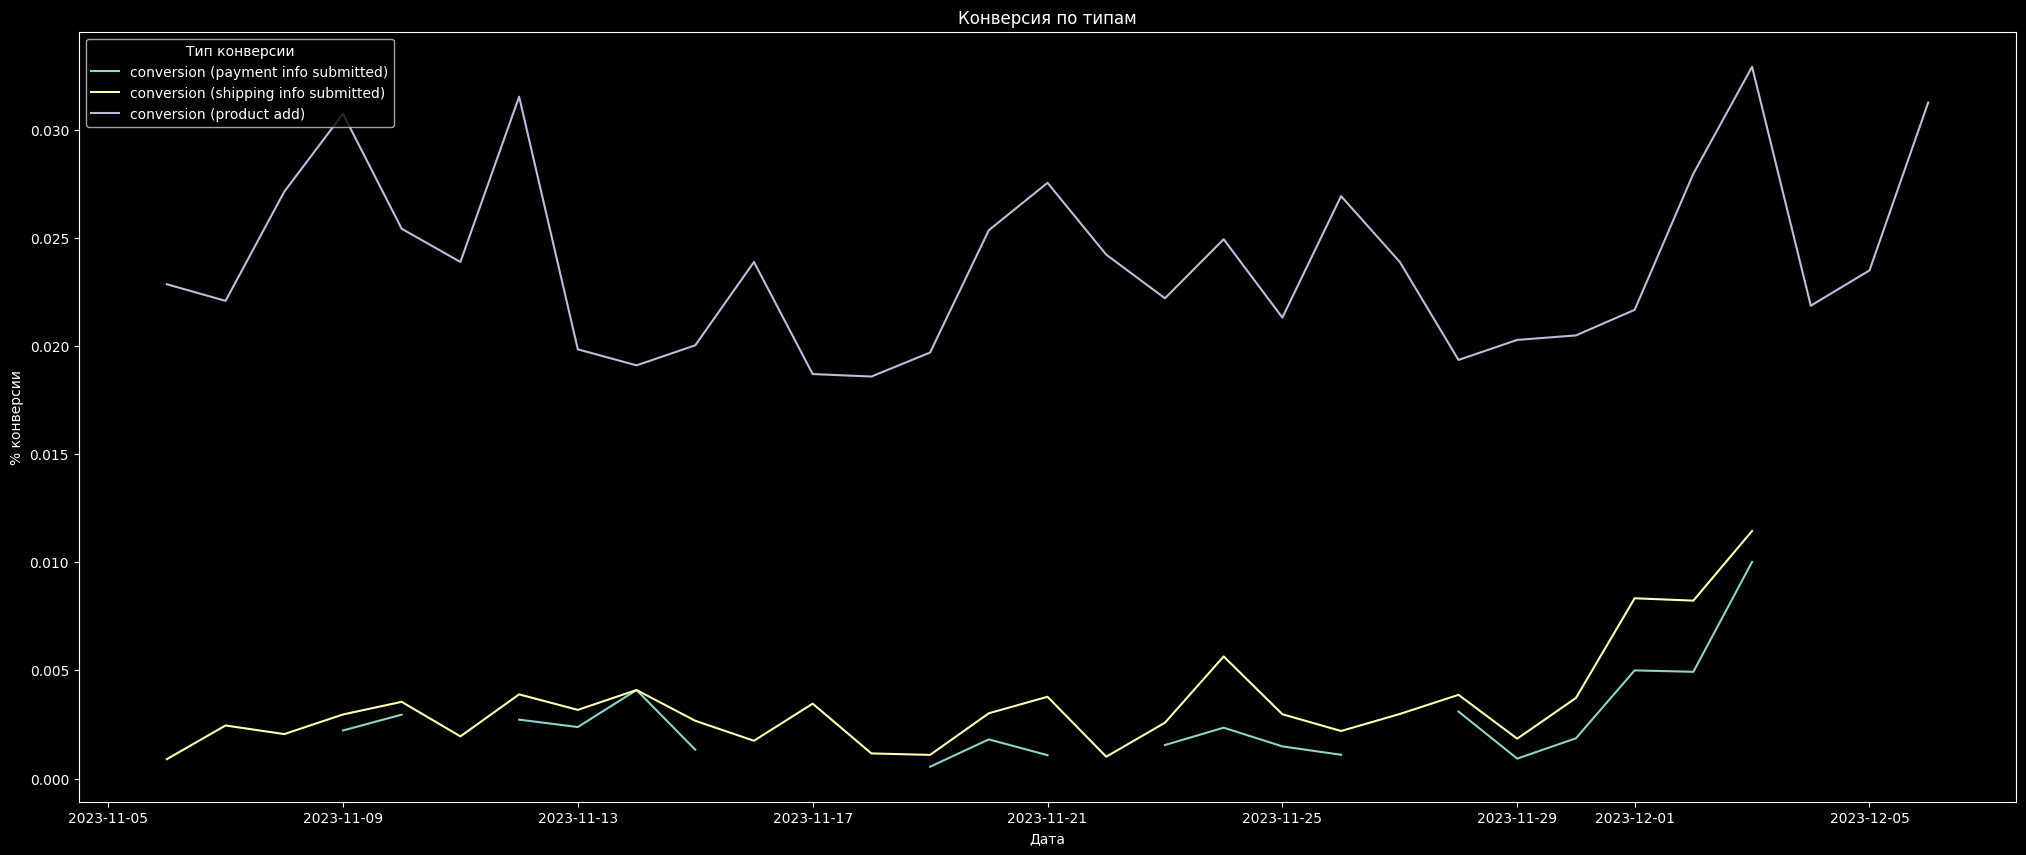

In [ ]:
plt.figure(figsize=(25, 10))

plt.plot(t['client_event_time'], t['conversion (payment info submitted)'], label='conversion (payment info submitted)')
plt.plot(t['client_event_time'], t['conversion (shipping info submitted)'], label='conversion (shipping info submitted)')
plt.plot(t['client_event_time'], t['conversion (product add)'], label='conversion (product add)')

plt.legend(loc='upper left');


plt.xlabel('Дата')
plt.ylabel('% конверсии')
plt.title('Конверсия по типам')


plt.legend(title='Тип конверсии', loc='upper left')

In [ ]:
data_country_only = df[filter_2].groupby([pd.Grouper(key='client_event_time', freq='W'), 'event_type', 'country'])[['session_id']].nunique().unstack('event_type')
data_country_only['total'] = data_country_only.sum(axis=1)
data_country_only = data_country_only.sort_values('total', ascending=False)


data_country_only.columns = [''.join(col[1]).strip() for col in data_country_only.columns.values]
data_country_only['total'] = data_country_only['']
data_country_only = data_country_only.drop('', axis=1)

data_country_only.head()

Add another one pressed  Configurator start  \
client_event_time country                                                       
2023-11-26        Germany                            11.0               846.0   
2023-11-19        Germany                             9.0               629.0   
2023-11-12        Germany                             6.0               369.0   
                  Austria                             6.0               370.0   
                  United Kingdom                     10.0               345.0   

                                  FAQ 1  FAQ 2  FAQ 3  FAQ 4  FAQ 5  \
client_event_time country                                             
2023-11-26        Germany           NaN    9.0    8.0    5.0    5.0   
2023-11-19        Germany           NaN    5.0    6.0    8.0    4.0   
2023-11-12        Germany           NaN    7.0    5.0    4.0    4.0   
                  Austria           1.0    6.0    2.0    2.0    1.0   
                  United Kingdom    NaN    5.0    2.0    4.0    5.0   

                                  Home page viewed  Next button clicked  \
client_event_time country                                                 
2023-11-26        Germany                     71.0                128.0   
2023-11-19        Germany                     47.0                 96.0   
2023-11-12        Germany                     36.0                 42.0   
                  Austria                     24.0                 59.0   
                  United Kingdom              18.0                 62.0   

                                  Random button clicked  ...  plus item  \
client_event_time country                                ...              
2023-11-26        Germany                          95.0  ...        2.0   
2023-11-19        Germany                          97.0  ...        1.0   
2023-11-12        Germany                          34.0  ...        NaN   
                  Austria                          62.0  ...        NaN   
                  United Kingdom                   32.0  ...        1.0   

                                  police doc pressed  product add  \
client_event_time country                                           
2023-11-26        Germany                        1.0        116.0   
2023-11-19        Germany                        NaN         83.0   
2023-11-12        Germany                        NaN         49.0   
                  Austria                        NaN         56.0   
                  United Kingdom                 NaN         67.0   

                                  product card submitted  product removed  \
client_event_time country                                                   
2023-11-26        Germany                           32.0             19.0   
2023-11-19        Germany                           24.0             18.0   
2023-11-12        Germany                           18.0             13.0   
                  Austria                           11.0             12.0   
                  United Kingdom                    14.0              7.0   

                                  review pressed  session_end  session_start  \
client_event_time country                                                      
2023-11-26        Germany                    1.0        178.0         1247.0   
2023-11-19        Germany                    1.0        137.0          933.0   
2023-11-12        Germany                    NaN         93.0          574.0   
                  Austria                    1.0         64.0          490.0   
                  United Kingdom             NaN         71.0          507.0   

                                  shipping info submitted   total  
client_event_time country                                          
2023-11-26        Germany                            11.0  5017.0  
2023-11-19        Germany                            10.0  3804.0  
2023-11-12        Germany                             5.0  

##Анализ конверсий по странам

###payment info submitted

In [ ]:
data_country_only['conversion (product add)'] = data_country_only['product add'] /	data_country_only['total']
data_country_only['conversion (shipping info submitted)'] = data_country_only['shipping info submitted'] /	data_country_only['total']
data_country_only['conversion (payment info submitted)'] = data_country_only['payment info submitted'] /	data_country_only['total']


t = data_country_only[['payment info submitted','shipping info submitted','product add', 'total', 'conversion (product add)', 'conversion (shipping info submitted)', 'conversion (payment info submitted)']].reset_index().sort_values('client_event_time')
t.head()

,client_event_time,country,payment info submitted,shipping info submitted,product add,total,conversion (product add),conversion (shipping info submitted),conversion (payment info submitted)
87,2023-10-22,Germany,NaN,NaN,NaN,5.0,NaN,NaN,NaN
95,2023-10-22,United States,NaN,NaN,NaN,3.0,NaN,NaN,NaN
104,2023-10-22,United Kingdom,NaN,NaN,NaN,1.0,NaN,NaN,NaN
103,2023-10-22,Netherlands,NaN,NaN,NaN,1.0,NaN,NaN,NaN
101,2023-10-22,France,NaN,NaN,NaN,2.0,NaN,NaN,NaN


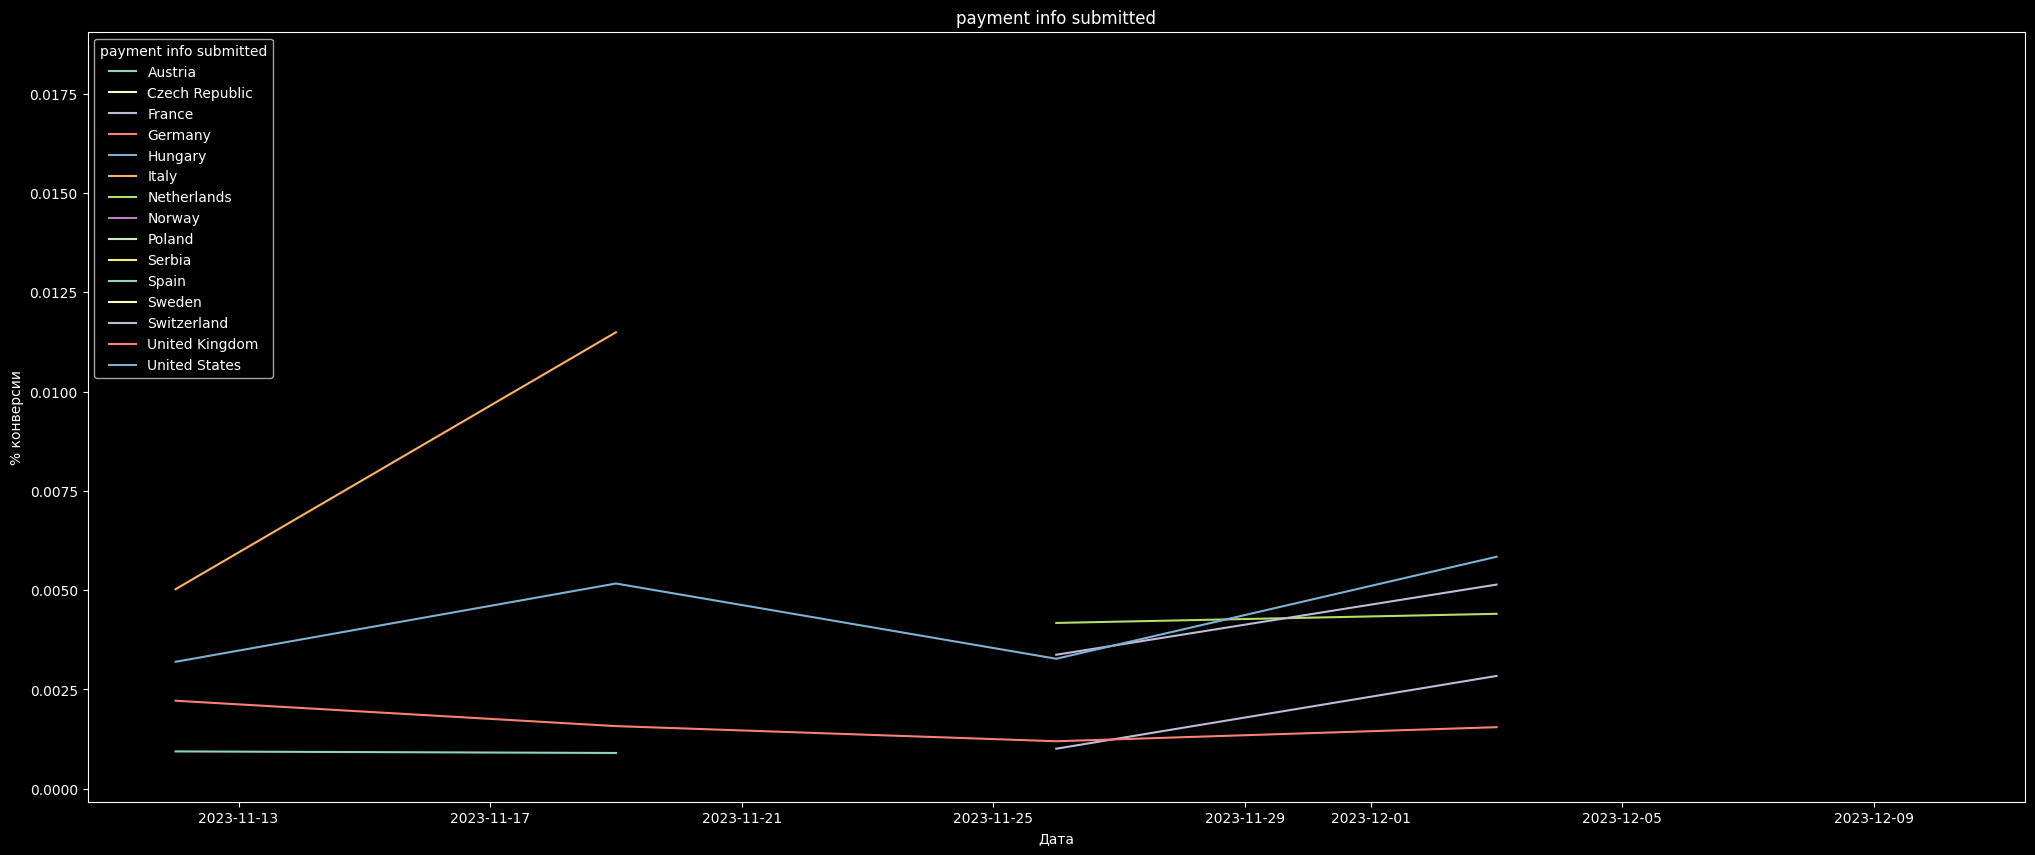

In [ ]:
plt.figure(figsize=(25, 10))

for country, group in t.groupby('country'):
  plt.plot(group['client_event_time'], group['conversion (payment info submitted)'], label=country)
  #plt.plot(group['client_event_time'], group['conversion (shipping info submitted)'], label=country)
  #plt.plot(group['client_event_time'], group['conversion (product add)'], label=country)

plt.legend(loc='upper left');

plt.xlabel('Дата')
plt.ylabel('% конверсии')
plt.title('payment info submitted')

plt.legend(title='payment info submitted', loc='upper left')

###shipping info submitted

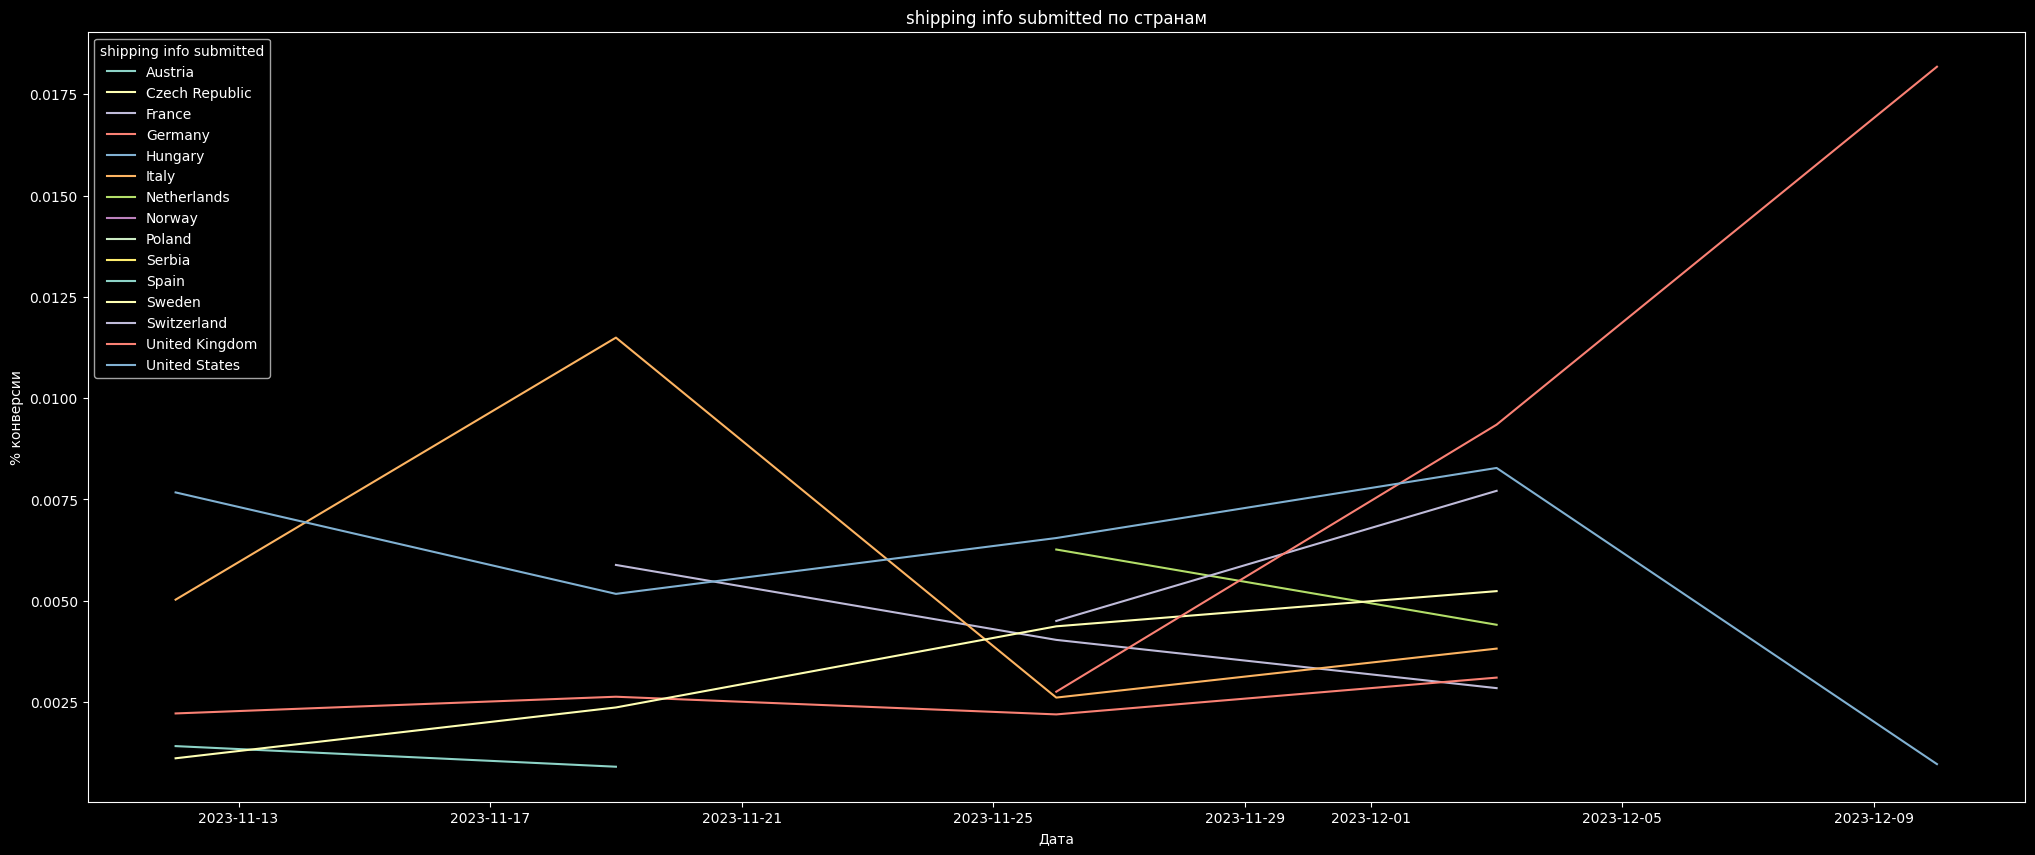

In [ ]:
plt.figure(figsize=(25, 10))

for country, group in t.groupby('country'):
  #plt.plot(group['client_event_time'], group['conversion (payment info submitted)'], label=country)
  plt.plot(group['client_event_time'], group['conversion (shipping info submitted)'], label=f'{country}')
  #plt.plot(group['client_event_time'], group['conversion (product add)'], label=country)

plt.legend(loc='upper left');

plt.xlabel('Дата')
plt.ylabel('% конверсии')
plt.title('shipping info submitted по странам')

plt.legend(title='shipping info submitted', loc='upper left')

###product add

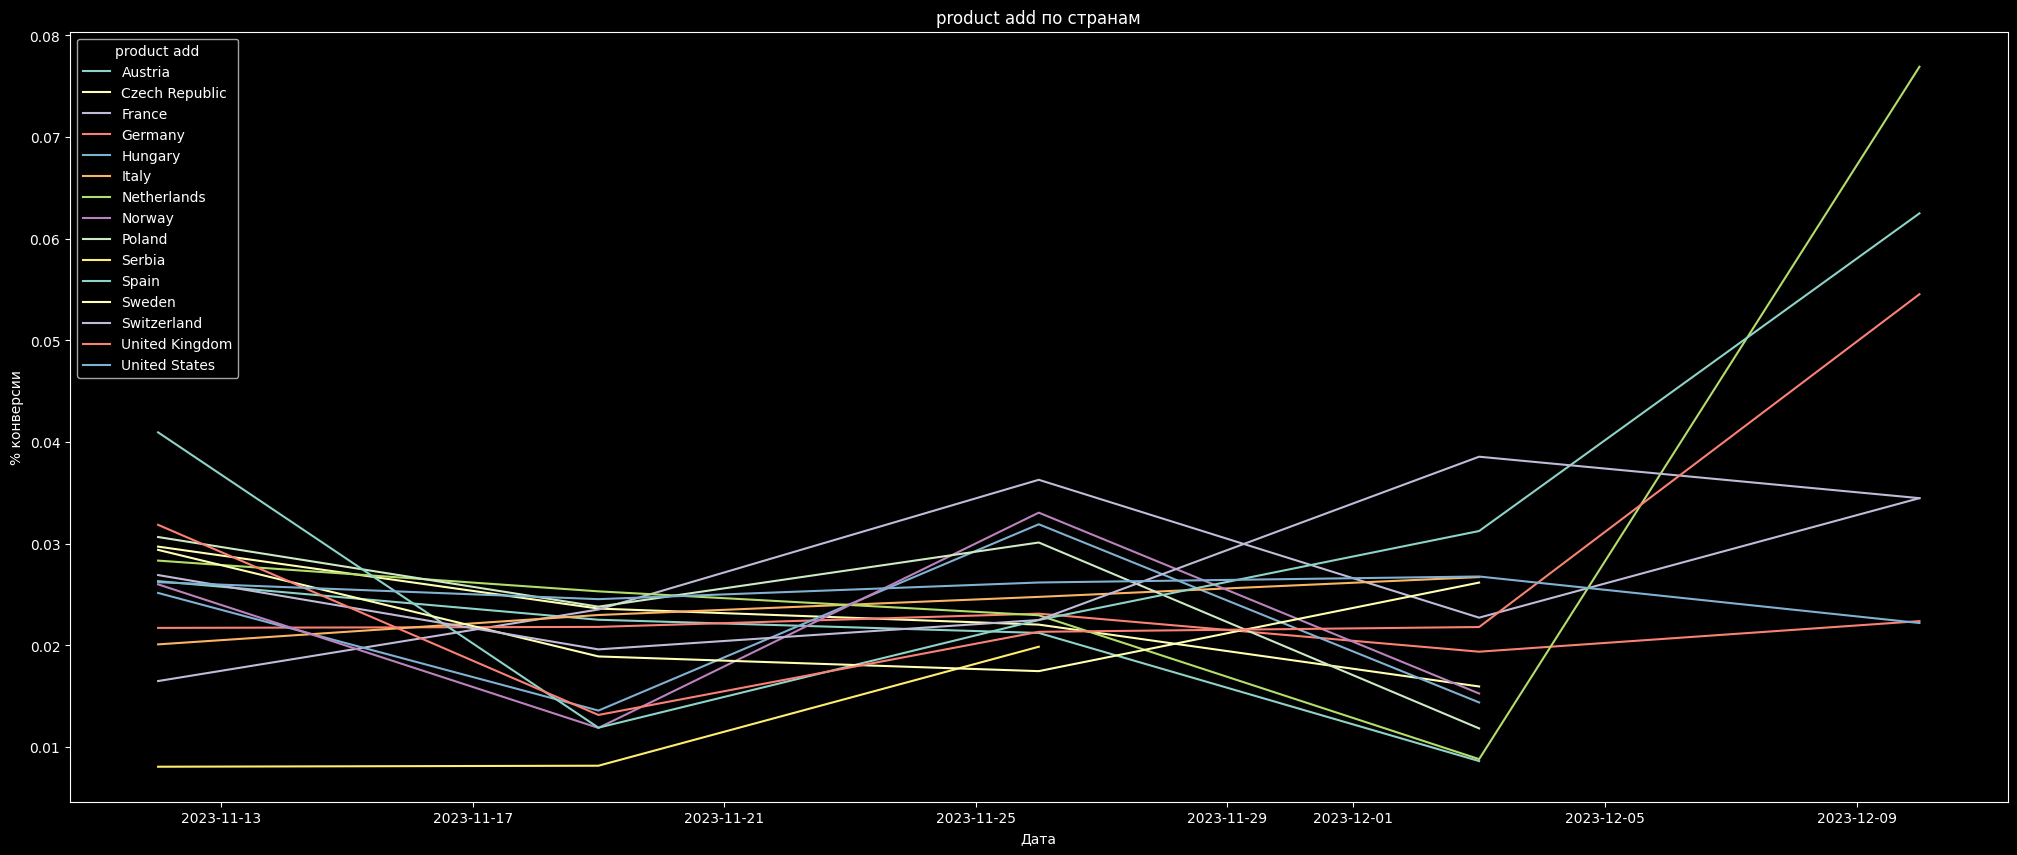

In [ ]:
plt.figure(figsize=(25, 10))

for country, group in t.groupby('country'):
  #plt.plot(group['client_event_time'], group['conversion (payment info submitted)'], label=country)
  #plt.plot(group['client_event_time'], group['conversion (shipping info submitted)'], label=f'{country}')
  plt.plot(group['client_event_time'], group['conversion (product add)'], label=country)

plt.legend(loc='upper left');

plt.xlabel('Дата')
plt.ylabel('% конверсии')
plt.title('product add по странам')

plt.legend(title='product add', loc='upper left')

In [ ]:
list_metrics = ['payment info submitted',	'shipping info submitted',	'product add',	'total']


a = t.groupby('country')[list_metrics].sum()
a['product add to payment info submitted'] = a['payment info submitted'] / a['product add']
a['product add to total'] = a['product add'] / a['total']
a = a.sort_values('product add to payment info submitted').reset_index()
a

,country,payment info submitted,shipping info submitted,product add,total,product add to payment info submitted,product add to total
0,Czech Republic,0.0,1.0,40.0,1606.0,0.000000,0.024907
1,Hungary,0.0,1.0,24.0,1117.0,0.000000,0.021486
2,Poland,0.0,0.0,34.0,1331.0,0.000000,0.025545
3,Spain,0.0,1.0,33.0,1131.0,0.000000,0.029178
4,Sweden,1.0,7.0,86.0,3532.0,0.011628,0.024349
5,United Kingdom,3.0,17.0,110.0,4132.0,0.027273,0.026621
6,Austria,3.0,4.0,91.0,3785.0,0.032967,0.024042
7,France,2.0,6.0,60.0,2238.0,0.033333,0.026810
8,Norway,2.0,4.0,53.0,2325.0,0.037736,0.022796
9,Germany,19.0,30.0,276.0,12572.0,0.068841,0.021954


#Вывод

1. Судя по всему пользователи не могут добраться до поля меню `payment info submitted` (см. картинка ниже) в таких странах как:
- Czech Republic
- Hungary
- Poland
- Spain
- Sweden
- United K
- Austria
- France
- Norway
- Germany
2. У `product add` у пользователей с разных стран - все нормально
2. До `payment status` никто не может добраться, потому что отсутствует в изначальном дата сете
3. **Итого у пользователей проблемы с меню при выборе метода оплаты**
4. PS. Интересноя явление с 8 по 15 окт 23г трафик из Гермиании резко упал, зато увеличился из других стран, потом резко стало как прежде


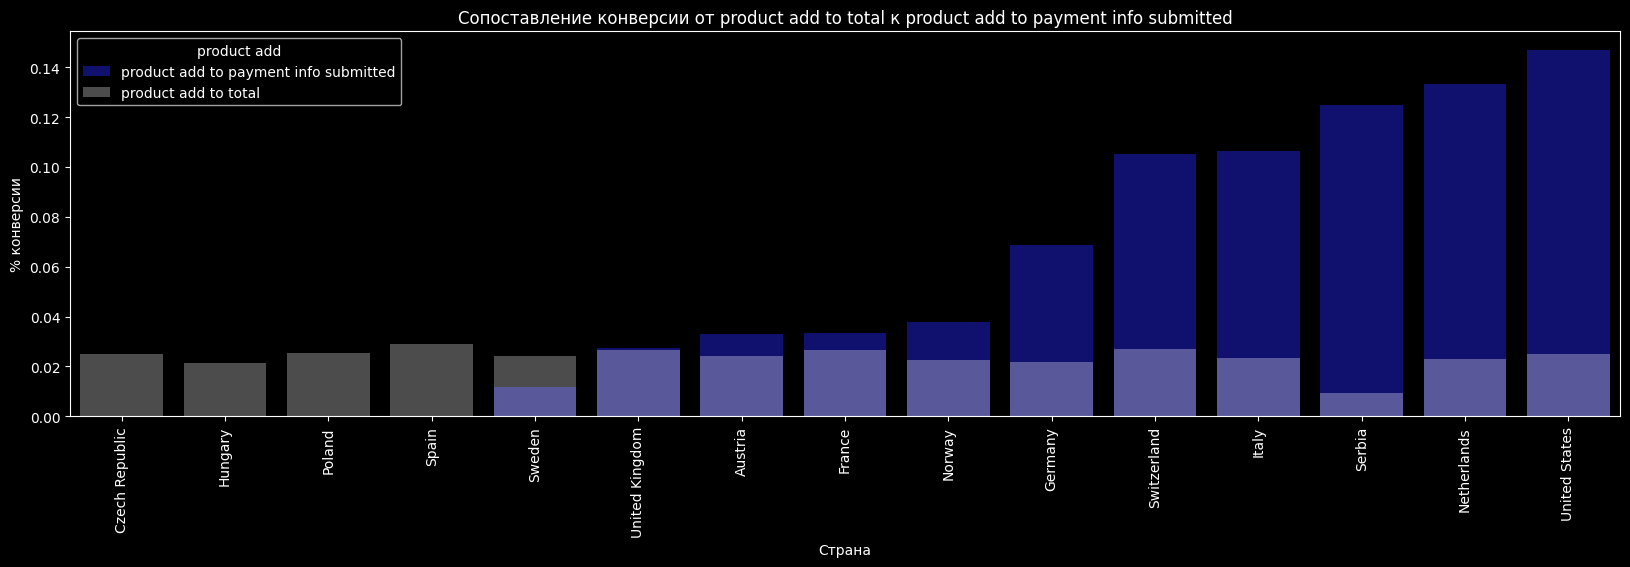

In [ ]:
plt.figure(figsize=(20, 5))
sns.barplot(x = a['country'], y = a['product add to payment info submitted'], alpha=0.5, label='product add to payment info submitted', color='Blue')
sns.barplot(x = a['country'], y = a['product add to total'], alpha=0.3, label='product add to total', color='White')


plt.xticks(rotation=90)

plt.xlabel('Страна')
plt.ylabel('% конверсии')
plt.title('Сопоставление конверсии от product add to total к product add to payment info submitted')

plt.legend(title='product add', loc='upper left');